<a href="https://colab.research.google.com/github/rahule-1999/M.Sc-Project/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
import numpy as np
import matplotlib.pyplot as plt

In [109]:
def signal_fn(t,A,w,phi):
  return A*np.sin((w*2*np.pi*t)+phi)

def noise_fn(std,n):
  return np.random.normal(0,std,n)

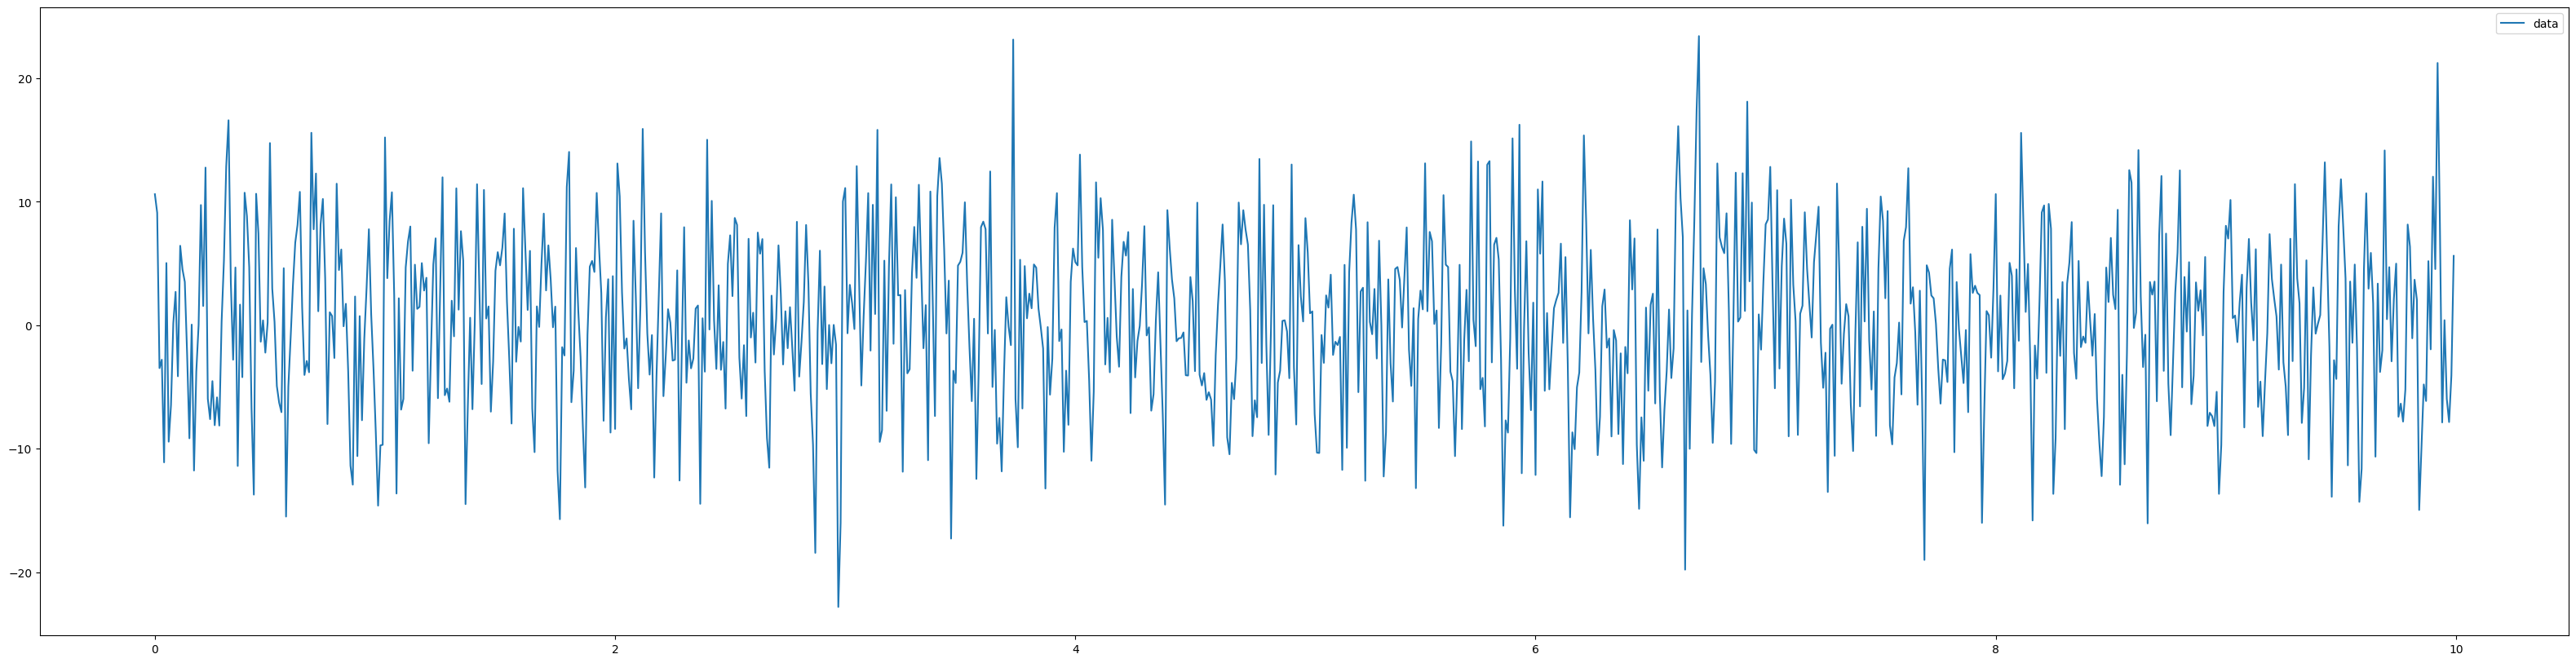

In [110]:
t = np.arange(0,10,0.01)

true_A = 5
true_w = 10
true_phi = np.pi/4
std = 6

sig = signal_fn(t,true_A,true_w,true_phi)
noise = noise_fn(std,len(t))
data = sig + noise

plt.figure(figsize=(40, 10))
#plt.plot(t,sig,label='signal')
plt.plot(t,data,label='data')
#plt.scatter(t,noise,label='noise')
plt.legend(loc='best')

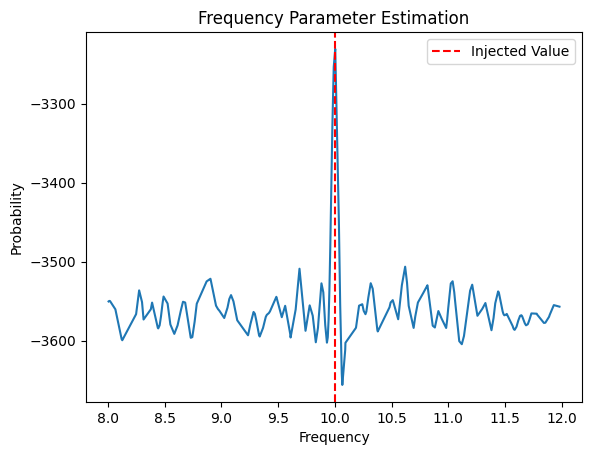

In [111]:
def ln_likelihood_w(t,true_A,w,true_phi,std,data):
  signal_data = signal_fn(t,true_A,w,true_phi)
  ln_likes = -0.5 * ((data - signal_data)**2 / std**2 + np.log(2*np.pi*std**2))
  return sum(ln_likes)


def get_prior_w(w_range,n):
  return np.random.uniform(w_range[0],w_range[1],n)

w_range = [8,12]
w_iter = get_prior_w(w_range,200)


w_and_likes = []

for i in w_iter:
  w_and_likes.append([i,ln_likelihood_w(t,true_A,i,true_phi,std,data)])

#Just for plotting
sorted_w_and_likes = sorted(w_and_likes,key=lambda x: x[0])
x=[x[0] for x in sorted_w_and_likes]
y=[x[1] for x in sorted_w_and_likes]
plt.plot(x,y)
plt.xlabel('Frequency')
plt.ylabel('Probability')
plt.axvline(x=10,color='red',label='Injected Value', linestyle='dashed')
plt.legend(loc='best')
plt.title('Frequency Parameter Estimation')

sorted_w_and_likes = sorted(w_and_likes,key=lambda x: x[1])
#sorted_w_and_likes

In [112]:
N_iter = 10000
i=0

w_Nsample=[]

while(i<N_iter):
  w_sample = get_prior_w(w_range,1)
  ln_likes_sample = ln_likelihood_w(t,true_A,w_sample,true_phi,std,data)

  if ln_likes_sample > sorted_w_and_likes[0][1]:
    w_Nsample.append(sorted_w_and_likes.pop(0))
    sorted_w_and_likes.append([w_sample[0],ln_likes_sample])
    sorted_w_and_likes = sorted(sorted_w_and_likes,key=lambda x: x[1])

  i+=1

w_Nsample = sorted(w_Nsample,key=lambda x: x[1])
#w_Nsample
#x=[x[0] for x in w_Nsample]
#x = list(np.around(np.array(x),3))
#plt.hist(x,bins=100)
# y=[x[1] for x in w_Nsample]
# plt.plot(x,y)

w_Nsample[-1]

[10.033108175356546, -3420.7371828216137]

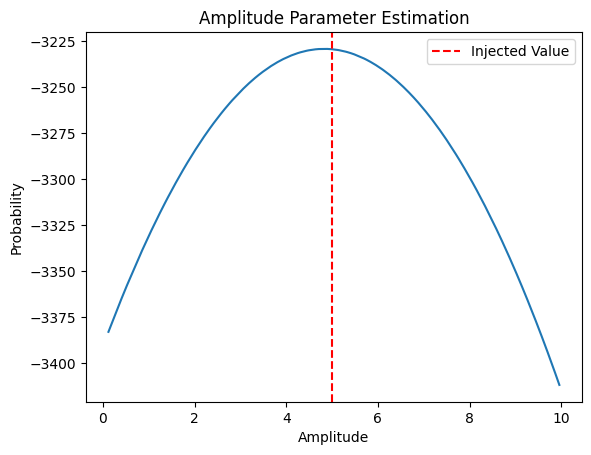

In [113]:
def ln_likelihood_A(t,A,true_w,true_phi,std,data):
  signal_data = signal_fn(t,A,true_w,true_phi)
  ln_likes = -0.5 * ((data - signal_data)**2 / std**2 + np.log(2*np.pi*std**2))
  return sum(ln_likes)


def get_prior_A(A_range,n):
  return np.random.uniform(A_range[0],A_range[1],n)

A_range = [0,10]
A_iter = get_prior_A(A_range,200)


A_and_likes = []

for i in A_iter:
  A_and_likes.append([i,ln_likelihood_A(t,i,true_w,true_phi,std,data)])

sorted_A_and_likes = sorted(A_and_likes,key=lambda x: x[0])
x=[x[0] for x in sorted_A_and_likes]
y=[x[1] for x in sorted_A_and_likes]
plt.plot(x,y)
plt.xlabel('Amplitude')
plt.ylabel('Probability')
plt.axvline(x=5,color='red',label='Injected Value', linestyle='dashed')
plt.legend(loc='best')
plt.title('Amplitude Parameter Estimation')


sorted_A_and_likes = sorted(A_and_likes,key=lambda x: x[1])
#sorted_w_and_likes

In [114]:
N_iter = 10000
i=0

A_Nsample=[]

while(i<N_iter):
  A_sample = get_prior_A(A_range,1)
  ln_likes_sample = ln_likelihood_A(t,A_sample,true_w,true_phi,std,data)

  if ln_likes_sample > sorted_A_and_likes[0][1]:
    A_Nsample.append(sorted_A_and_likes.pop(0))
    sorted_A_and_likes.append([A_sample[0],ln_likes_sample])
    sorted_A_and_likes = sorted(sorted_A_and_likes,key=lambda x: x[1])

  i+=1

A_Nsample = sorted(A_Nsample,key=lambda x: x[1])
#w_Nsample
#plt.hist(A_Nsample)
#x = list(np.around(np.array(x),3))
#plt.hist(x,bins=100)
# y=[x[1] for x in w_Nsample]
# plt.plot(x,y)

In [115]:
def ln_likelihood_A_and_w(t,A,w,true_phi,std,data):
  signal_data = signal_fn(t,A,w,true_phi)
  ln_likes = -0.5 * ((data - signal_data)**2 / std**2 + np.log(2*np.pi*std**2))
  return sum(ln_likes)


def get_prior_A(A_range,n):
  return np.random.uniform(A_range[0],A_range[1],n)

A_range = [1,10]
A_iter = get_prior_A(A_range,100)

def get_prior_w(w_range,n):
  return np.random.uniform(w_range[0],w_range[1],n)

w_range = [8,12]
w_iter = get_prior_w(w_range,100)

A_and_w_likes = []

for i in range(len(A_iter)):
  A_and_w_likes.append([A_iter[i],w_iter[i],ln_likelihood_A(t,A_iter[i],w_iter[i],true_phi,std,data)])

sorted_A_and_w_likes = sorted(A_and_w_likes,key=lambda x: x[2])
#sorted_A_and_w_likes

# x=[x[0] for x in sorted_A_and_w_likes]
# y=[x[1] for x in sorted_A_and_w_likes]
# plt.plot(x,y)
# plt.xlabel('Amplitude')
# plt.ylabel('Probability')
# plt.axvline(x=1.5,color='red',label='Injected Value', linestyle='dashed')
# plt.legend(loc='best')
# plt.title('Amplitude Parameter Estimation')
#sorted_A_and_likes = sorted(A_and_likes,key=lambda x: x[1])
#sorted_w_and_likes

(array([ 38.,  44.,  48.,  26., 126., 136.,  52.,  41.,  44.,  41.]),
 array([ 8.01743297,  8.41436044,  8.81128791,  9.20821537,  9.60514284,
        10.00207031, 10.39899778, 10.79592525, 11.19285272, 11.58978019,
        11.98670765]),
 <BarContainer object of 10 artists>)

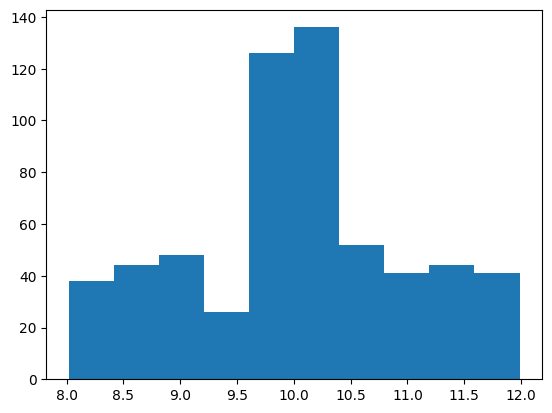

In [116]:
N_iter = 50000
i=0

A_and_w_Nsample=[]

while(i<N_iter):
  A_sample = get_prior_A(A_range,1)
  w_sample = get_prior_w(w_range,1)
  ln_likes_sample = ln_likelihood_A(t,A_sample,w_sample,true_phi,std,data)

  if ln_likes_sample > sorted_A_and_w_likes[0][2]:
    A_and_w_Nsample.append(sorted_A_and_w_likes.pop(0))
    sorted_A_and_w_likes.append([A_sample[0],w_sample[0],ln_likes_sample])
    sorted_A_and_w_likes = sorted(sorted_A_and_w_likes,key=lambda x: x[2])

  i+=1

A_and_w_Nsample = sorted(A_and_w_Nsample,key=lambda x: x[2])
#w_Nsample
A_and_w_Nsample
x1 = [x[0] for x in A_and_w_Nsample]
x2 = [x[1] for x in A_and_w_Nsample]
x3 = [x[2] for x in A_and_w_Nsample]
#plt.hist(x1)
plt.hist(x2)
#x = list(np.around(np.array(x),3))
#plt.hist(x,bins=100)
# y=[x[1] for x in w_Nsample]
# plt.plot(x,y)


(array([228.,  97.,  62.,  43.,  37.,  30.,  34.,  27.,  22.,  16.]),
 array([1.00498738, 1.89931488, 2.79364239, 3.68796989, 4.58229739,
        5.4766249 , 6.3709524 , 7.2652799 , 8.15960741, 9.05393491,
        9.94826242]),
 <BarContainer object of 10 artists>)

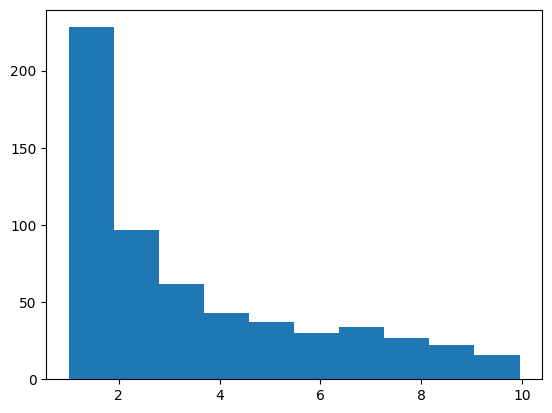

In [117]:
plt.hist(x1)
